<a href="https://colab.research.google.com/github/DataMounster/DS-Unit-1-Sprint-2-Statistics/blob/master/Elif_Ayar__of_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


**CONFIDENCE INTERVALS:**

1) Generate and numerically represent s confidence interval


In [0]:
# Loaad all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_1samp

 

In [2]:
# Load the raw data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data


--2020-05-25 02:10:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-05-25 02:10:00 (137 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
columns_name=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

In [4]:
vote_house=pd.read_csv('house-votes-84.data', header=None, names=columns_name, na_values='?')
vote_house.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [5]:
# Let's check the data and see what we have
vote_house.shape

(435, 17)

In [6]:
vote_house.describe()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [7]:
vote_house.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

I want to clear the missing informations and convert the all columns values as interger numbers. Then, I will analysis the parties' votes on water projects, and education. I will create a sample distribution in order to find confidence interval sets, so population mean will fall in these two sets with confidence level.


In [8]:
# let say y=1, no=0
vote_house=vote_house.replace({'y':1, 'n':0})
vote_house.head(3)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [0]:
# Create democrat and republican datasets separate
democrat=vote_house[vote_house['party']=='democrat']
republican=vote_house[vote_house['party']=='republican']

In [10]:
democrat.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [11]:
republican.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [12]:
print(republican.shape)
print(democrat.shape)
print(vote_house.shape)

(168, 17)
(267, 17)
(435, 17)


Looks good all datasets.

In [0]:
# Let's generate a 95% of confidence interval with republican
import scipy.stats as stats


I want to check the confidence interval by creating function.

In [14]:
def confidence_interval(data, confidence=0.95):

  mean=np.mean(data)
  n=len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - moe, mean + moe)
confidence_interval(democrat['water-project'])

(0.502092050209205, 0.4417180951442038, 0.5624660052742062)

In [15]:
# Confidence interval for republican

confidence_interval(republican['water-project'])


(0.5067567567567568, 0.43034597330474833, 0.5831675402087653)

To sum up, confedence interval of republican's vote on the water project is between 0.4303 and 0.58316

Confidence interval of democrat is between 0.4417 and 0.5624



2) Graphically (with a plot) represent the confidence interval

In [16]:
# Republican

import seaborn as sns
print(democrat['water-project'].mean())



0.502092050209205


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


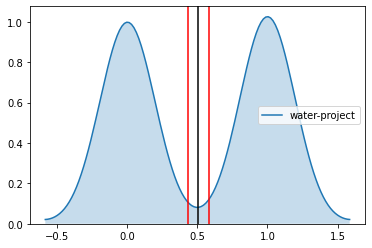

In [17]:
sns.kdeplot(republican['water-project'],shade=True)
CI=confidence_interval(republican['water-project'])
plt.axvline(CI[0], color='k')
plt.axvline(CI[1], color='red')
plt.axvline(CI[2], color='red');

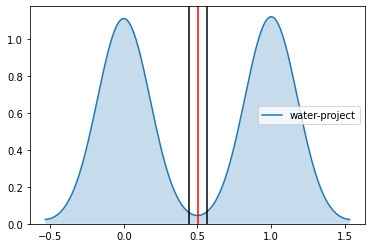

In [18]:
# Democrat
sns.kdeplot(democrat['water-project'],shade=True)
CI=confidence_interval(democrat['water-project'])
plt.axvline(CI[0], color='r')
plt.axvline(CI[1], color='k')
plt.axvline(CI[2], color='k');

**3)** Interpret the confidence interval - what does it tell you about the data and its distribution?

Answer= Let's talk about the democrates' votes on the water-project bill. The confidence interval, 0.4417180951442038, 0.5624660052742062, tells us that mean of votes on the project is between this interval. If we have null hyphothesis, and base on this CI, we can conclude to fail to reject the hyphotesis or reject to hypetheses.  For example, Let's say on average, 75% of  democrates support the water project bill. 
Null Hypothesis: mean of democrate's support on the project mean is .75

 

In [0]:
from scipy.stats import t, ttest_1samp

In [20]:
ttest_1samp(confidence_interval(democrat['water-project']), .75)

Ttest_1sampResult(statistic=-7.112158946280599, pvalue=0.019201981824416386)

Because of low statistics, and low pvalue, I reject the Null Hyphothesis. Thus, 95% confidence level, on average 75% of democrats do not support the water project bill.

**CHI-SQUARED TEST:**

Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
By hand using Numpy
In a single line using Scipy

In [0]:
import numpy as np


In [22]:
adult = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(adult.shape)
adult.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
adult.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [24]:
adult['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [25]:
adult['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [49]:
# Let's look at the crosstab
adult_tab=pd.crosstab(adult['sex'],adult['race'],  margins=True)
adult_tab

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
sex,,,,,,
Female,119,346,1555,109,8642,10771
Male,192,693,1569,162,19174,21790
All,311,1039,3124,271,27816,32561


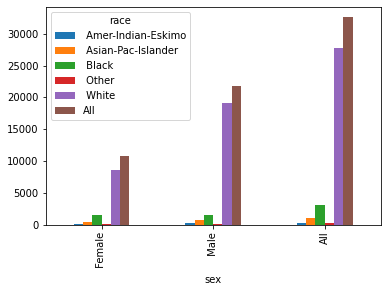

In [53]:
adult_tab.plot(kind='bar');

**Expected Value Calculation**

In [56]:
sum_row=adult_tab.iloc[0:2,5].values 
sum_row

array([10771, 21790])

In [58]:
sum_col=adult_tab.iloc[2,0:5].values
sum_col

array([  311,  1039,  3124,   271, 27816])

In [59]:
total=adult_tab.loc['All','All']
total

32561

In [70]:
# What are the expected values
expected=[]
for number in range(len(sum_row)):
  expected_row=[]
  for column in sum_col:
    expected_val=column*sum_row[number]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
pd.DataFrame(expected)



,0,1,2,3,4
0,102.877092,343.695495,1033.402045,89.645312,9201.380056
1,208.122908,695.304505,2090.597955,181.354688,18614.619944


In [74]:
observed=pd.crosstab(adult['sex'],adult['race']).values
pd.DataFrame(observed)

,0,1,2,3,4
0,119,346,1555,109,8642
1,192,693,1569,162,19174


We have an expected values and observed values which do not have margins as a numpy, and then converted as a dataframe now.

Let's get start Chi Test by Numpy


In [75]:
chi_squared = ((observed - expected)**2/(expected)).sum()
chi_squared

454.2671089131088

In [78]:
#degree of freedom

dof = (len(sum_row)-1)* (len(sum_col)-1)
dof

4

Stats, 454.267 is so high, so we can reject the Null Hypothesis 

Let's do Chi squared test in a single line using Scipy

In [79]:
stats.chi2_contingency(observed)

(454.2671089131088,
 5.192061302760456e-97,
 4,
 array([[  102.87709223,   343.69549461,  1033.40204539,    89.64531188,
          9201.3800559 ],
        [  208.12290777,   695.30450539,  2090.59795461,   181.35468812,
         18614.6199441 ]]))

Conclusion:
Null Hypothesis: Race is independent of sex.

Because of a p-value is so small,0.0, we can reject the null hypothesis , I can conclude that there is an dependence relationship between race and sex.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

1) As I use the t-test to find sample mean of democrats' votes on the water project bill, I found the confidence interval as well. If I predict that the sample mean represents the population mean between the confidence interval, I can make a conclusion based on null hypothesis test. If my null hypothesis is outside of the range (CI), I can reject the hypothesis with 95% confidence. If not, I can fail to reject the hypothesis. Even though there is still 0.05 probability to make erron on my conclusion, this is very small probability.  I am confidence to say hypothesis reject or fail to reject with my confidence level. 


2) 

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)